## Exploratory Data Analysis

In BRICS countries, exploratory data analysis (EDA) is a critical procedure for analysing economic data. It assists academics and policymakers in learning about economic trends, inequities, and anomalies. EDA allows for the comparison of economic indicators across different countries, assisting in the assessment of their relative economic performance. It provides vital information for informed decision-making in sectors such as trade, investment, and policy formulation by exposing hidden links and correlations. Additionally, it is critical in a dynamic economic landscape for understanding the complexities of economic data, guiding strategies, and encouraging sustainable growth and collaboration among the BRICS members.

For my data, EDA is the only method to uncover the hidden insights within the dataset that will help me explore the data in comparison to all the nations at hand.

In [115]:
import  pandas  as  pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [116]:
india=pd.read_csv('../data/csv_files_numerical_countries/india.csv')
russia=pd.read_csv('../data/csv_files_numerical_countries/russia.csv')
china=pd.read_csv('../data/csv_files_numerical_countries/china.csv')
brazil=pd.read_csv('../data/csv_files_numerical_countries/brazil.csv')
southafrica=pd.read_csv('../data/csv_files_numerical_countries/southafrica.csv')

I created and treated five separate datasets. In terms of India, you see that there is a greater variation in Exports and Imports as a % of GDP and in Trade GDP. This is due to the developing nature of India, being one of the fastest growing economies of the world.

In [117]:
india.describe()

,year,adj_NNI_g,adj_NNI_c,adj_savings_fix_cap_GNI,adj_savings_edu_GNI,adj_NNS_GNI,curr_acc_bal,ex_imp_gdp,ex_imp_growth,ex_debt_shocks,...,trade_gdp,cpi,inflation,real_interest_rate,lending_interest_rate,life_exp_birth,expense_gdp,interest_payments,military expenditure,year.1
count,43.000000,43.000000,4.300000e+01,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,...,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,2000.000000,5.842249,9.089853e+11,10.100195,3.177411,16.975547,-1.348015,14.313641,9.439492,20.750216,...,30.948268,73.732095,7.656467,5.631990,13.114440,62.858024,14.942512,27.081472,2.901476,2000.000000
std,12.556539,3.928440,6.357574e+11,0.737280,0.360385,6.502949,1.209384,6.769738,9.631641,4.938651,...,14.657456,58.271793,3.027370,2.572440,3.092273,5.115946,1.271353,6.641309,0.439018,12.556539
min,1979.000000,-6.952693,2.413109e+11,8.055168,2.600000,6.418183,-5.004890,5.196222,-9.135286,11.096107,...,12.219272,9.737409,3.328173,-1.983859,8.333350,53.611000,11.376034,13.780033,2.424285,1979.000000
25%,1989.500000,4.152437,3.949670e+11,9.733032,3.080000,11.701860,-1.902352,7.773796,4.728976,17.849354,...,16.246994,24.540550,4.927595,4.406809,10.270833,58.853500,14.600384,23.190785,2.563654,1989.500000
50%,2000.000000,5.842249,6.759609e+11,10.347631,3.080000,17.400965,-1.339509,12.997236,7.792389,20.201660,...,26.900923,56.391926,7.164252,5.814777,12.541667,62.858024,15.145108,27.081472,2.812528,2000.000000
75%,2010.500000,8.350734,1.284807e+12,10.621234,3.210531,22.549359,-0.800226,20.164174,14.331228,22.921025,...,44.642326,114.073666,9.748438,7.597561,16.500000,67.074500,15.561610,31.898042,3.131583,2010.500000
max,2021.000000,12.397011,2.367047e+12,11.088283,4.290000,26.670888,1.443561,25.430861,31.396073,33.157433,...,55.793722,205.266241,13.870246,9.191247,18.916667,70.910000,17.227670,40.936291,4.231318,2021.000000


In [118]:
india.info() # the data is in correct format except year since it will later be dropped but we need it for analysis now.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           43 non-null     int64  
 1   adj_NNI_g                      43 non-null     float64
 2   adj_NNI_c                      43 non-null     float64
 3   adj_savings_fix_cap_GNI        43 non-null     float64
 4   adj_savings_edu_GNI            43 non-null     float64
 5   adj_NNS_GNI                    43 non-null     float64
 6   curr_acc_bal                   43 non-null     float64
 7   ex_imp_gdp                     43 non-null     float64
 8   ex_imp_growth                  43 non-null     float64
 9   ex_debt_shocks                 43 non-null     float64
 10  final_consump_exp_gdp          43 non-null     float64
 11  final_consump_exp_growth       43 non-null     float64
 12  fdi_net_inflows                43 non-null     float

For Russia, if you see, there were periods in Russia where they were in deficit to the times they in surplus showcasing their evolultion as a nature with the economic and geopolitical wars Russia engages in. In terms of the Adjusted Savings as a % of GNI, you also see the huge difference and a huge variation in the dataset. It talks a reduction in their education expenses due to which they have it as a savings in their GNI% category. Inflation, Lending Interest Rate are also shown to be extremely volatile in nature, thus showcasing their non-linear nature of spending habits and the state of their economy.

In [119]:
russia.describe()

,year,adj_NNI_g,adj_NNI_c,adj_savings_fix_cap_GNI,adj_savings_edu_GNI,adj_NNS_GNI,curr_acc_bal,ex_imp_gdp,ex_imp_growth,ex_debt_shocks,...,trade_gdp,cpi,inflation,real_interest_rate,lending_interest_rate,life_exp_birth,expense_gdp,interest_payments,military expenditure,year.1
count,29.000000,29.000000,2.900000e+01,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,...,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2008.000000,3.861741,8.291734e+11,3.927901,17.793590,3.720208,28.294512,10.513962,5.655151,30.589212,...,52.635377,2.534344,35.634946,52.396738,87.843702,32.123031,0.120247,68.190967,3.758945,2008.000000
std,8.514693,10.236271,2.921181e+11,10.384020,10.665802,0.299095,3.452955,11.810984,4.118602,4.933515,...,2.821579,5.021355,36.505148,6.405027,61.438903,64.958295,8.320392,2.703291,0.557789,8.514693
min,1994.000000,-20.796923,3.281460e+11,-20.769775,9.545284,3.544344,20.202553,-19.694782,-0.206268,24.729842,...,44.832608,-10.125699,10.364800,43.774114,2.128943,2.878297,-18.951553,64.467073,2.732649,1994.000000
25%,2001.000000,-1.349856,5.790573e+11,-1.485800,11.784852,3.549808,27.117473,10.513962,2.369115,27.111097,...,50.658271,-0.636282,13.365498,47.801341,37.365785,6.849392,-4.078692,65.529756,3.331237,2001.000000
50%,2008.000000,3.861741,9.051567e+11,3.927901,13.503027,3.557456,28.294512,14.094360,4.754527,29.215561,...,53.428806,2.447491,16.480539,50.557744,83.826166,11.647330,0.120247,67.949268,3.720451,2008.000000
75%,2015.000000,10.726779,1.097922e+12,11.149953,17.793590,3.720208,29.714409,17.784660,7.952329,33.730475,...,54.172944,5.539901,38.844163,55.772253,131.155273,20.798761,4.945604,70.578780,4.039809,2015.000000
max,2022.000000,22.534768,1.157478e+12,23.051254,48.011109,4.413240,37.116967,22.081369,17.474242,44.060441,...,57.012325,13.621542,136.909949,69.393281,199.372063,307.722636,19.616081,73.083902,5.425148,2022.000000


In [120]:
russia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           29 non-null     int64  
 1   adj_NNI_g                      29 non-null     float64
 2   adj_NNI_c                      29 non-null     float64
 3   adj_savings_fix_cap_GNI        29 non-null     float64
 4   adj_savings_edu_GNI            29 non-null     float64
 5   adj_NNS_GNI                    29 non-null     float64
 6   curr_acc_bal                   29 non-null     float64
 7   ex_imp_gdp                     29 non-null     float64
 8   ex_imp_growth                  29 non-null     float64
 9   ex_debt_shocks                 29 non-null     float64
 10  final_consump_exp_gdp          29 non-null     float64
 11  final_consump_exp_growth       29 non-null     float64
 12  fdi_net_inflows                29 non-null     float

China, personally has been one of the most interesting nations to learn about as most of the data that China shares with people is also the data it "chooses" to share. The book of Silk Route has shows China in from a fascinating point of view. If you look at China, there is not much of volatile relations to be seen in China. The way they function being a manufacturing nation has been non-volatile primarily depending on their masses as it is a labour-intensive nation that is now emerging to steer towards knowledge management. One of my most favorite nations from an economics lens.

In [121]:
china.describe()

,year,adj_NNI_g,adj_NNI_c,adj_savings_fix_cap_GNI,adj_savings_edu_GNI,adj_NNS_GNI,curr_acc_bal,ex_imp_gdp,ex_imp_growth,ex_debt_shocks,...,trade_gdp,cpi,inflation,real_interest_rate,lending_interest_rate,life_exp_birth,expense_gdp,interest_payments,military expenditure,year.1
count,34.000000,34.000000,3.400000e+01,34.000000,3.400000e+01,34.000000,34.000000,34.000000,34.000000,34.000000,...,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,2005.500000,9.020550,5.132355e+12,16.290555,1.013829e+12,1.774727,43.537202,27.237859,2.643568,21.768803,...,42.792335,9.143661,25.335231,40.718724,90.500166,4.287894,1.955882,73.560848,9.693714,2005.500000
std,9.958246,3.063379,2.753216e+12,5.047229,1.176837e+12,0.098320,4.676922,4.451970,2.597303,6.628568,...,7.114816,2.918800,11.593431,11.671459,26.687641,5.787973,3.226872,3.291144,3.867794,9.958246
min,1989.000000,0.043030,1.227478e+12,9.402707,3.274752e+10,1.500000,35.858594,18.788405,-2.610340,9.027345,...,32.382773,1.947122,7.615140,19.134707,39.242469,-1.401473,-7.989744,67.838000,4.772260,1989.000000
25%,1997.250000,7.953956,2.787246e+12,12.756853,1.233250e+11,1.787135,39.537538,24.090842,1.507681,18.359073,...,35.927687,8.277122,18.020955,34.340981,80.755872,1.476052,-0.117685,70.797000,5.973111,1997.250000
50%,2005.500000,9.020550,5.132355e+12,14.564874,3.661130e+11,1.790000,43.716609,27.359017,2.108668,20.128060,...,42.138080,9.368637,23.923220,37.888116,87.222774,2.519473,2.579420,73.929500,10.208033,2005.500000
75%,2013.750000,10.723327,6.609833e+12,20.891664,1.725745e+12,1.790000,47.236811,30.986592,3.427569,25.306856,...,47.923306,10.388286,30.183370,47.886736,112.760046,4.568735,3.748206,76.387000,13.169320,2013.750000
max,2022.000000,15.198015,1.049563e+13,26.143102,3.816893e+12,2.035901,51.547499,35.188528,9.947890,36.035026,...,54.458536,16.071495,55.930751,64.478884,131.919357,24.256990,7.356478,78.211000,16.867626,2022.000000


In [122]:
china.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           34 non-null     int64  
 1   adj_NNI_g                      34 non-null     float64
 2   adj_NNI_c                      34 non-null     float64
 3   adj_savings_fix_cap_GNI        34 non-null     float64
 4   adj_savings_edu_GNI            34 non-null     float64
 5   adj_NNS_GNI                    34 non-null     float64
 6   curr_acc_bal                   34 non-null     float64
 7   ex_imp_gdp                     34 non-null     float64
 8   ex_imp_growth                  34 non-null     float64
 9   ex_debt_shocks                 34 non-null     float64
 10  final_consump_exp_gdp          0 non-null      float64
 11  final_consump_exp_growth       34 non-null     float64
 12  fdi_net_inflows                34 non-null     float

South Africa has been a country with intense socio-political changes. Due to which the deviations seen from this nation can be quite altering. The inflation and the lending interest rates show us the economy has always been in recession most of the time, often asking for foreign aid from other developed nations. Yet, South Africa, due to this labour and natural capital is now emerging to be one of the competing nations.

In [123]:
southafrica.describe()

,year,adj_NNI_g,adj_NNI_c,adj_savings_fix_cap_GNI,adj_savings_edu_GNI,adj_NNS_GNI,curr_acc_bal,ex_imp_gdp,ex_imp_growth,ex_debt_shocks,...,trade_gdp,cpi,inflation,real_interest_rate,lending_interest_rate,life_exp_birth,expense_gdp,interest_payments,military expenditure,year.1
count,50.00000,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,1997.50000,2.944993,1.726618e+11,1.019058,14.617378,5.340494,19.599354,4.980877,-0.977091,25.449196,...,57.961911,2.920324,119.946081,48.797300,62.701001,8.937808,3.317721,60.457939,2.295429,1997.50000
std,14.57738,4.186829,7.426311e+10,4.208455,1.600373,0.483089,5.516894,5.373903,2.918324,3.539869,...,5.748344,2.180185,61.294859,7.353538,53.653821,4.429910,4.321426,3.316655,1.372066,14.57738
min,1973.00000,-6.105116,8.169750e+10,-8.844539,12.005429,4.600000,13.810482,-0.595410,-5.586817,18.955147,...,46.894611,-4.398186,60.145736,34.321353,2.896167,-0.692030,-11.009011,53.980000,0.739894,1973.00000
25%,1985.25000,0.866885,1.031776e+11,-0.602860,13.568121,5.039765,15.241517,1.154841,-2.950219,22.578834,...,52.237073,1.572643,87.004999,43.553642,13.055219,5.424068,1.939067,58.122000,1.035020,1985.25000
50%,1997.50000,2.923929,1.612442e+11,0.828012,14.160999,5.130000,17.501936,3.362576,-1.163550,25.792956,...,60.182314,2.983437,119.946081,48.838556,52.323241,8.639113,3.610582,60.869000,1.555722,1997.50000
75%,2009.75000,4.908132,2.438179e+11,3.076031,15.655139,5.614009,22.769737,5.869842,1.181907,27.709766,...,63.379119,4.425018,119.946081,54.093948,99.017739,12.660460,4.930434,63.044000,3.632120,2009.75000
max,2022.00000,15.909859,2.991770e+11,13.825588,18.693445,6.600000,33.709562,21.039421,5.287891,33.443871,...,64.716759,6.939034,462.705392,65.974524,183.682744,18.654919,12.691034,66.175000,5.263335,2022.00000


In [124]:
southafrica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           50 non-null     int64  
 1   adj_NNI_g                      50 non-null     float64
 2   adj_NNI_c                      50 non-null     float64
 3   adj_savings_fix_cap_GNI        50 non-null     float64
 4   adj_savings_edu_GNI            50 non-null     float64
 5   adj_NNS_GNI                    50 non-null     float64
 6   curr_acc_bal                   50 non-null     float64
 7   ex_imp_gdp                     50 non-null     float64
 8   ex_imp_growth                  50 non-null     float64
 9   ex_debt_shocks                 50 non-null     float64
 10  final_consump_exp_gdp          50 non-null     float64
 11  final_consump_exp_growth       50 non-null     float64
 12  fdi_net_inflows                50 non-null     float

Brazil's economic context various in accordance to the time, with periods of normal growth and periods of high growth, that also states the nature of it's geo-political reign. If you look at the indicators, the Adjusted Savings for Fixed Capital and Trade GDP are interesting to look at.

In [125]:
brazil.describe()

,adj_NNI_g,adj_NNI_c,adj_savings_fix_cap_GNI,adj_savings_edu_GNI,adj_NNS_GNI,curr_acc_bal,ex_imp_gdp,ex_imp_growth,ex_debt_shocks,final_consump_exp_gdp,...,trade_gdp,cpi,inflation,real_interest_rate,lending_interest_rate,life_exp_birth,expense_gdp,interest_payments,military expenditure,year
count,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.00000
mean,2.858273,9.927705e+11,1.270081,10.750257,4.457679,17.787293,7.006470,-2.259920,11.170290,6.063046,...,53.893826,3.464068,84.382637,22.197876,6.731385e+01,280.265403,38.892255,68.136286,1.596424,1997.50000
std,5.537414,3.618374e+11,5.374688,0.495756,0.988642,3.798667,3.663059,2.017774,3.329268,7.934414,...,9.139374,3.591394,86.860088,5.873609,5.793798e+01,591.724093,10.483542,5.049809,0.337717,14.57738
min,-13.457070,4.678463e+11,-15.009283,9.925297,2.800000,11.179231,0.949568,-6.014062,6.692986,-10.574251,...,38.714484,-3.738107,8.731629,14.390878,3.572040e-10,3.195076,16.728245,58.472000,1.053422,1973.00000
25%,0.329104,6.674528e+11,-1.043909,10.453263,3.806250,14.939308,4.276090,-3.729127,8.317338,0.483849,...,43.356767,1.590630,21.868827,16.658106,2.911174e-01,6.235493,35.108576,64.308500,1.368802,1985.25000
50%,2.888449,9.484250e+11,1.270081,10.624243,4.345000,18.026720,7.006470,-2.545527,10.866948,5.625319,...,57.590546,3.012630,61.252703,21.441260,6.731385e+01,11.997513,38.892255,68.611000,1.521730,1997.50000
75%,5.450817,1.315305e+12,3.548577,10.981732,5.082500,19.508526,8.286224,-0.394964,13.232901,11.656455,...,60.452174,5.030491,93.389959,25.977764,9.880075e+01,280.265403,38.892255,72.741250,1.832601,2009.75000
max,22.343467,1.629388e+12,20.413400,12.111642,6.285939,33.988799,23.294785,1.559017,20.045538,22.614292,...,73.337880,15.641424,437.374535,39.339994,2.044821e+02,2947.732772,77.616838,75.338000,2.686250,2022.00000


In [126]:
brazil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   adj_NNI_g                      50 non-null     float64
 1   adj_NNI_c                      50 non-null     float64
 2   adj_savings_fix_cap_GNI        50 non-null     float64
 3   adj_savings_edu_GNI            50 non-null     float64
 4   adj_NNS_GNI                    50 non-null     float64
 5   curr_acc_bal                   50 non-null     float64
 6   ex_imp_gdp                     50 non-null     float64
 7   ex_imp_growth                  50 non-null     float64
 8   ex_debt_shocks                 50 non-null     float64
 9   final_consump_exp_gdp          50 non-null     float64
 10  final_consump_exp_growth       50 non-null     float64
 11  fdi_net_inflows                50 non-null     float64
 12  fdi_net_outflows               50 non-null     float

Normalising all of the national data in exploratory data analysis (EDA) is essential for unbiased feature comparison. By guaranteeing that numerical features have a common scale, it helps to avoid biases in analysis. Effective data exploration is facilitated by normalisation, which also improves interpretability, supports the stability of optimisation algorithms, and helps with pattern recognition. Normalisation minimises the effects of different magnitudes, so during EDA, it optimises data preparation for further analyses or machine learning modelling. This lays the groundwork for trustworthy insights and well-informed judgements.

In [127]:
# india 
years_keep = india[['year']]
labels = india['labels']
cols_nor = india.select_dtypes(include=['float64', 'int64'])
cols_nor= cols_nor.drop(columns=['year'])
scaler = StandardScaler()
normalized_columns = scaler.fit_transform(cols_nor)
india = pd.DataFrame(normalized_columns, columns=cols_nor.columns)
india = pd.concat([years_keep, labels, india], axis=1)

# russia 
years_keep1 = russia[['year']]
labels1 = russia['labels']
cols_nor1 = russia.select_dtypes(include=['float64', 'int64'])
cols_nor1= cols_nor1.drop(columns=['year'])
normalized_columns1 = scaler.fit_transform(cols_nor1)
russia = pd.DataFrame(normalized_columns1, columns=cols_nor1.columns)
russia = pd.concat([years_keep1, labels1, russia], axis=1)

# china 
years_keep2 = china[['year']]
labels2 = china['labels']
cols_nor2 = china.select_dtypes(include=['float64', 'int64'])
cols_nor2= cols_nor2.drop(columns=['year'])
normalized_columns2 = scaler.fit_transform(cols_nor2)
china = pd.DataFrame(normalized_columns2, columns=cols_nor2.columns)
china = pd.concat([years_keep2, labels2, china], axis=1)

# south africa 
years_keep3 = southafrica[['year']]
labels3 = southafrica['labels']
cols_nor3 = southafrica.select_dtypes(include=['float64', 'int64'])
cols_nor3= cols_nor3.drop(columns=['year'])
normalized_columns3 = scaler.fit_transform(cols_nor3)
southafrica = pd.DataFrame(normalized_columns3, columns=cols_nor3.columns)
southafrica = pd.concat([years_keep3, labels3, southafrica], axis=1)

# brazil
years_keep4 = brazil[['year']]
labels4 = brazil['labels']
cols_nor4 = brazil.select_dtypes(include=['float64', 'int64'])
cols_nor4= cols_nor4.drop(columns=['year'])
normalized_columns4 = scaler.fit_transform(cols_nor4)
brazil = pd.DataFrame(normalized_columns4, columns=cols_nor4.columns)
brazil = pd.concat([years_keep4, labels4, brazil], axis=1)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [142]:
display(india.head(5))

,year,labels,adj_NNI_g,adj_NNI_c,adj_savings_fix_cap_GNI,adj_savings_edu_GNI,adj_NNS_GNI,curr_acc_bal,ex_imp_gdp,ex_imp_growth,...,trade_gdp,cpi,inflation,real_interest_rate,lending_interest_rate,life_exp_birth,expense_gdp,interest_payments,military expenditure,year.1
0,1979,High Growth,1.580504,-1.052491,-2.806571,-1.621168,-1.642687,0.326249,-1.221735,-0.441451,...,-1.074394,-1.111207,1.233173,-0.454493,1.107802,-1.828882,-2.578654,-2.026537,0.535410,-1.692228
1,1980,High Growth,-2.167406,-1.062632,-2.342460,-1.621168,-1.494116,-0.038933,-1.252155,-1.077470,...,-1.134957,-1.089037,1.823580,-0.202078,1.107802,-1.717334,-2.838462,-1.981865,0.656334,-1.611646
2,1981,Moderate Growth,-1.085896,-1.056386,-1.757818,-0.354753,-1.545443,0.075919,-1.245089,-0.359175,...,-1.161281,-1.073945,0.078302,0.842809,1.107802,-1.607170,-2.373800,-1.754889,1.022491,-1.531064
3,1982,Very High Growth,1.473242,-1.011259,-2.306850,-0.067311,-1.548303,0.385343,-1.266862,-1.087764,...,-1.191333,-1.049456,1.407643,0.664344,1.107802,-1.498588,-2.279951,-1.465790,0.971674,-1.450481
4,1983,Moderate Growth,-1.027763,-1.003195,-1.805840,-1.340403,-1.536923,0.216440,-1.200235,-0.224986,...,-1.169327,-1.030254,0.221407,0.910618,1.107802,-1.392776,-1.432214,-1.229516,1.187877,-1.369899


### Visual Data Representation

#### Histograms

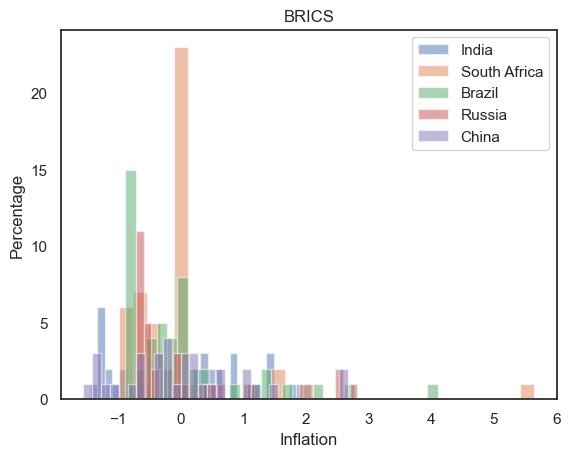

In [128]:
fig, ax = plt.subplots()
ax.hist(india["inflation"], bins=30, alpha=0.5, label='India')
ax.hist(southafrica["inflation"], bins=30, alpha=0.5, label='South Africa')
ax.hist(brazil["inflation"], bins=30, alpha=0.5, label='Brazil')
ax.hist(russia["inflation"], bins=30, alpha=0.5, label='Russia')
ax.hist(china["inflation"], bins=30, alpha=0.5, label='China')

ax.set_xlabel('Inflation')
ax.set_ylabel('Percentage')
ax.set_title('BRICS')
ax.legend()
plt.show()

If you look at the inflation, you see South Africa and Brazil having higher bouts of inflation than China or India. This tells us about the nature of their economy and the role of their sustainable and geo-political contexts.

#### Scatterplots

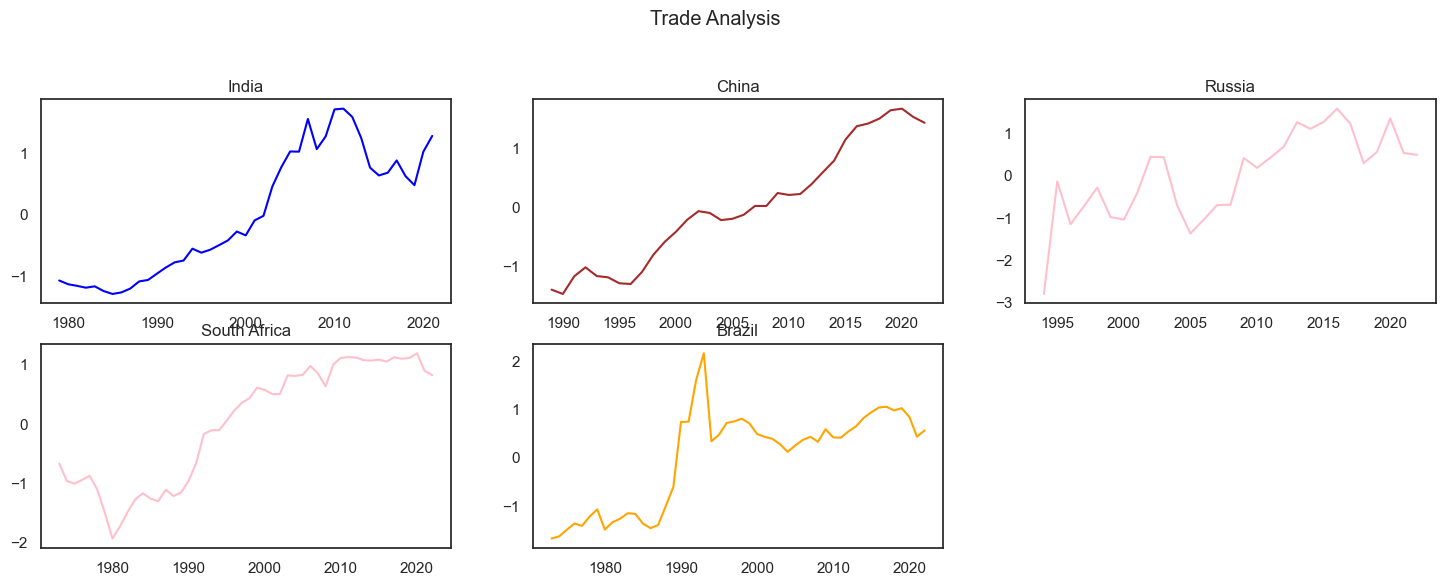

In [129]:
fig= plt.figure(figsize=(18, 9))
fig.suptitle('Trade Analysis')

ax1= fig.add_subplot(331)
ax1.set_title('India')
ax1.plot(india['year'],
        india['trade_gdp'],
        color='blue')
ax2= fig.add_subplot(332)
ax2.set_title('China')
ax2.plot(china['year'],
        china['trade_gdp'],
        color='brown')
ax3= fig.add_subplot(333)
ax3.set_title('Russia')
ax3.plot(russia['year'],
        russia['trade_gdp'],
        color='pink')
ax4= fig.add_subplot(334)
ax4.set_title('South Africa')
ax4.plot(southafrica['year'],
        southafrica['trade_gdp'],
        color='pink')
ax5= fig.add_subplot(335)
ax5.set_title('Brazil')
ax5.plot(brazil['year'],
        brazil['trade_gdp'],
        color='orange')

In terms of each countries' Trade GDP, we see Russia performing better than Brazil and South Africa which a linear growth as it is increasing at an increasing rate. In terms of China, it's trade % of the GDP has been positively rising. India, due to it's economic crisis and the flush of trade borders opening emphasised on more international trade than it's other counter-parts during that time. When you look at Brazil, Brazil's influx of trade was more in the early 1990's and it casually decreased. In terms of South Africa, you see it's trade was completely closed in the 1980s due to its dependency on other natures with not have much resources to trade, but over a period of time, that changed.

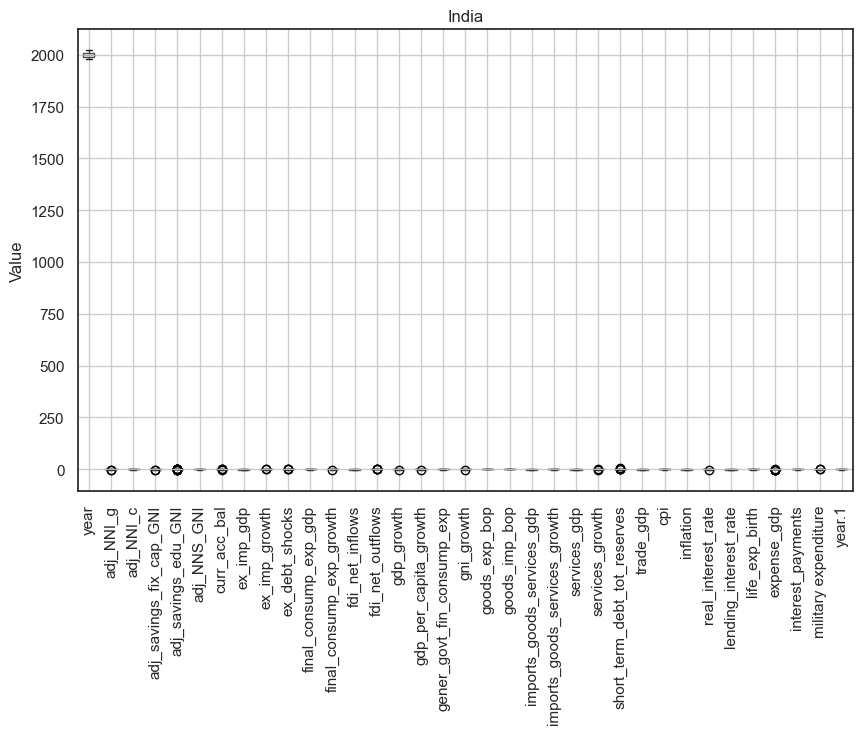

In [130]:
# Create a Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a boxplot for all numerical columns in the DataFrame
india.boxplot(ax=ax)

# Add labels and a title
ax.set_ylabel('Value')
ax.set_title('India')

# Show the plot
plt.xticks(rotation=90)
plt.show()

If you look at India's boxplot graph, the adjusted Net National Income growth, the percentage of goods and the goods imported's percentages are the data that has shown high variability, showcasing the importance of data bias and data normalisation. Yet,you also see vast differences in the max and min values between the blot points.

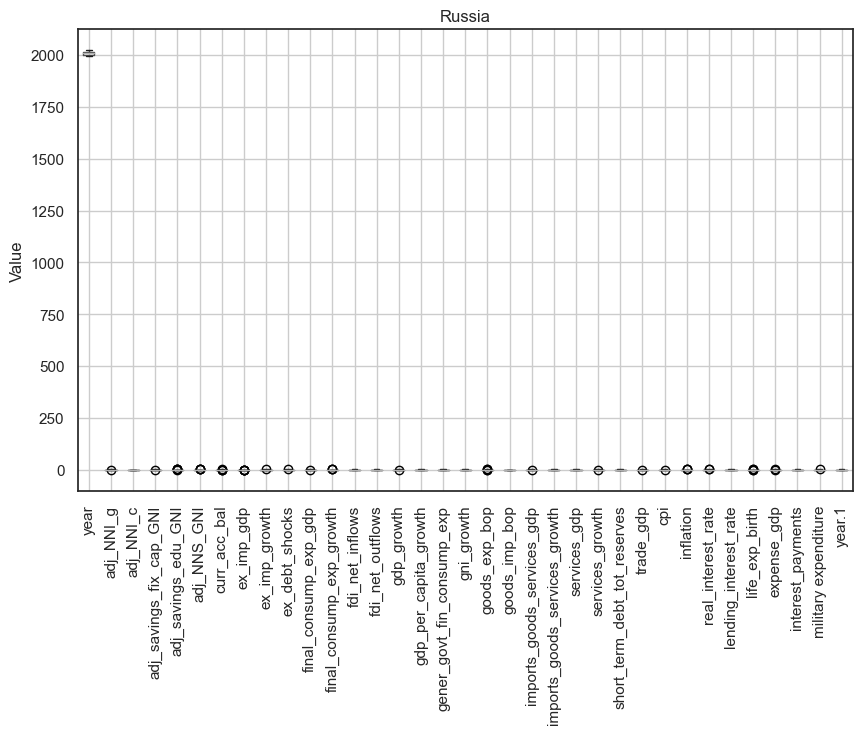

In [131]:
fig, ax = plt.subplots(figsize=(10, 6))
russia.boxplot(ax=ax)
ax.set_ylabel('Value')
ax.set_title('Russia')
plt.xticks(rotation=90)
plt.show()

It is the same case with russia, but the services GDP % is actually high. If you see, the Imports of Goods and Servies as a % of GDP has greater variability and even the Services as a % of GDP. 

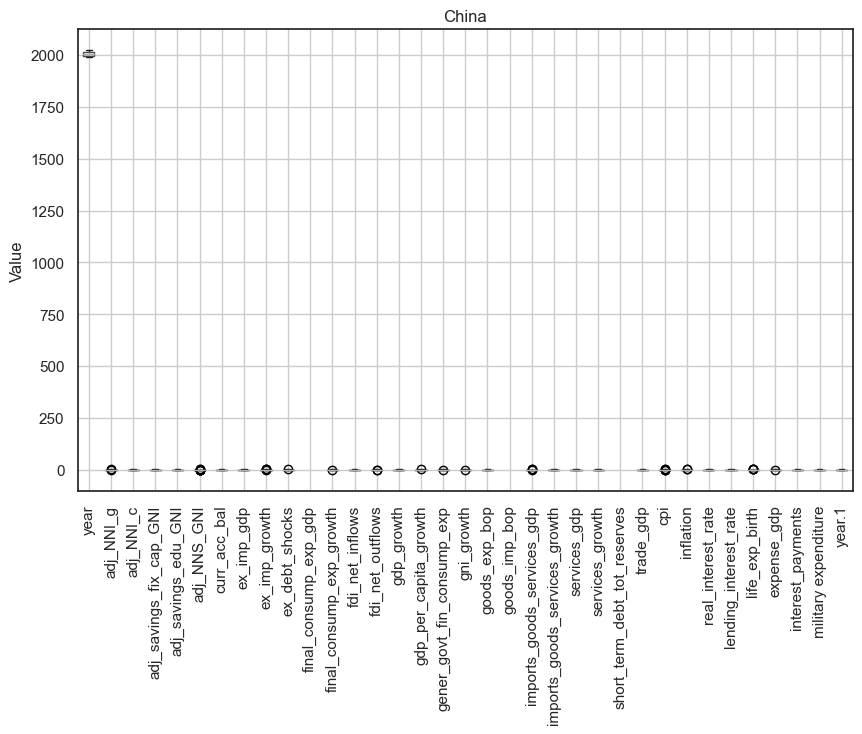

In [132]:
fig, ax = plt.subplots(figsize=(10, 6))
china.boxplot(ax=ax)
ax.set_ylabel('Value')
ax.set_title('China')
plt.xticks(rotation=90)
plt.show()

In terms of, you don't see a lot of variability in the dataset except the educational expenses, the Imports of Goods and Services as a percentage of Growth, the % of services as a GDP.

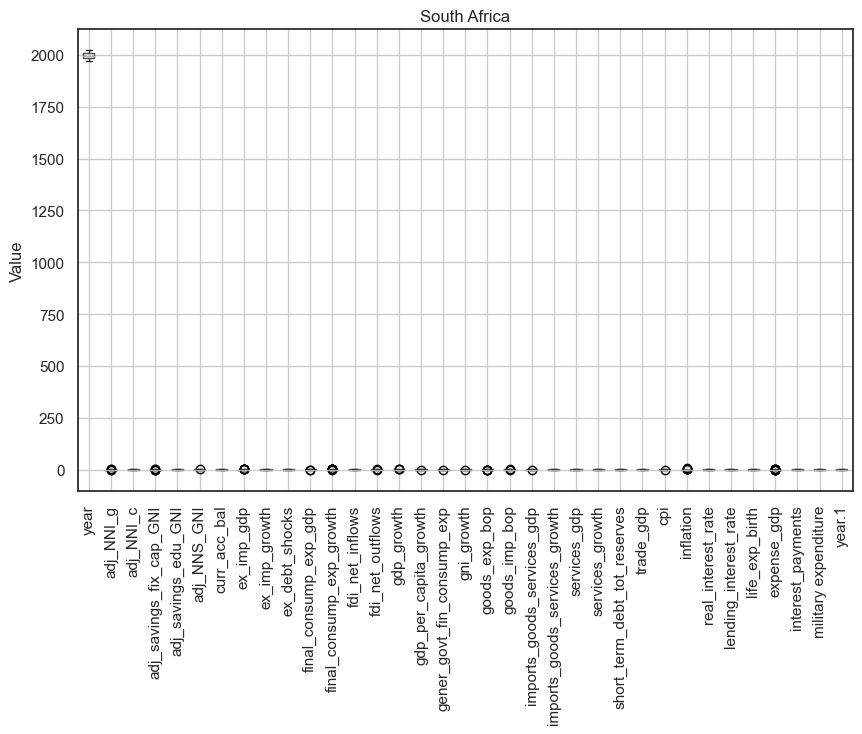

In [133]:
fig, ax = plt.subplots(figsize=(10, 6))
southafrica.boxplot(ax=ax)
ax.set_ylabel('Value')
ax.set_title('South Africa')
plt.xticks(rotation=90)
plt.show()

For South Africa, you see how the data shows the variability for similar ones highlighting the importance of data-normalisation.

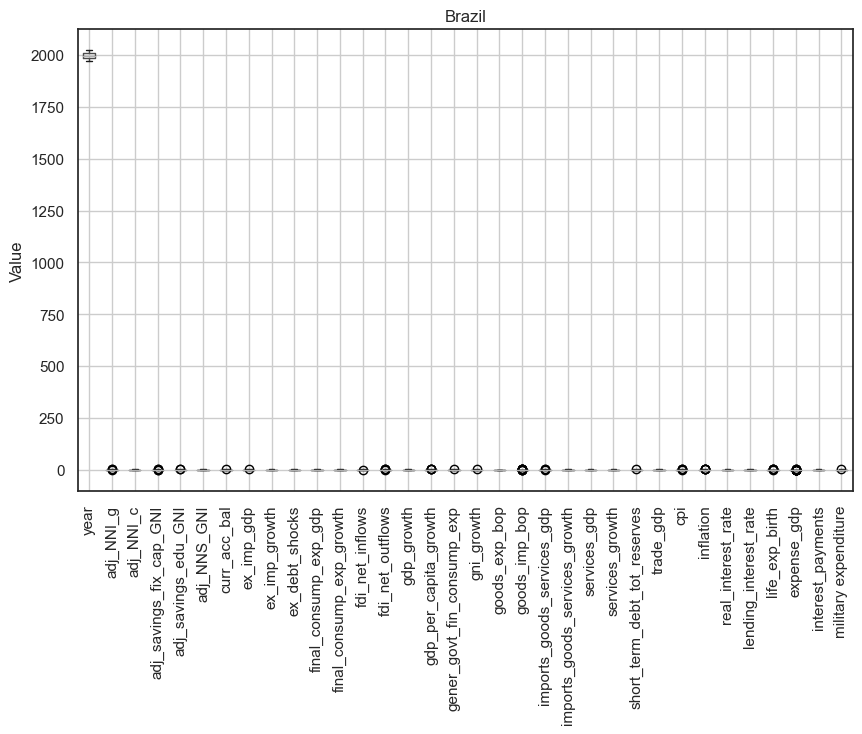

In [134]:
fig, ax = plt.subplots(figsize=(10, 6))
brazil.boxplot(ax=ax)
ax.set_ylabel('Value')
ax.set_title('Brazil')
plt.xticks(rotation=90)
plt.show()

But the variability is comparitively lesser for Brazil.

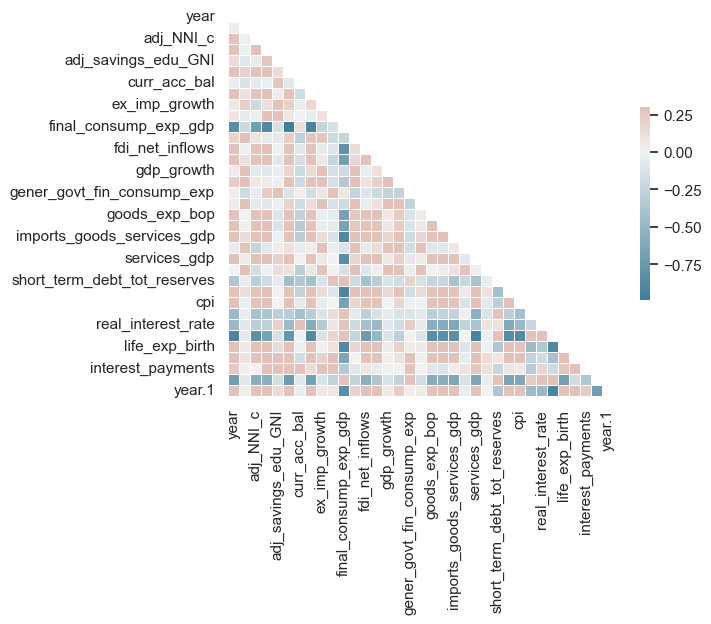

In [135]:
sns.set_theme(style="white")
corr = india.corr(numeric_only=True)  #Computing correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool)) 
f, ax = plt.subplots(figsize=(7, 5))
cmap = sns.diverging_palette(230, 20, as_cmap=True) 
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

If you look at the variables that are correlated with each other, and a lot of variables that are negatively correlated with each other. For instance, Ajusted Net National Income in positively correlated with other variables and Final Consumption Expenditure is negatively correlated to the data.

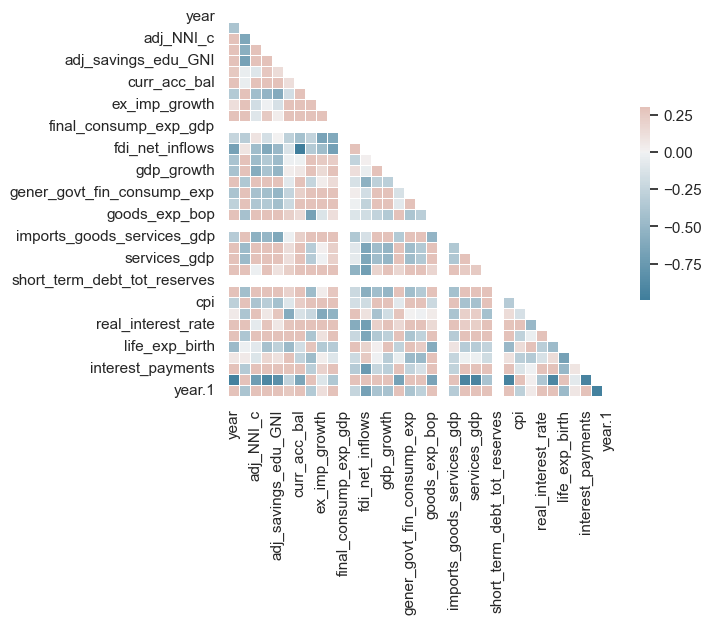

In [136]:
sns.set_theme(style="white")
corr = china.corr(numeric_only=True)  #Computing correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool)) 
f, ax = plt.subplots(figsize=(7, 5))
cmap = sns.diverging_palette(230, 20, as_cmap=True) 
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

For China, interest payments are negatively correlated to most of the variables, so that FDI Net Inflows, and even the General Government Final Expenditure. And majority of the variables are positively correlated to each other too.

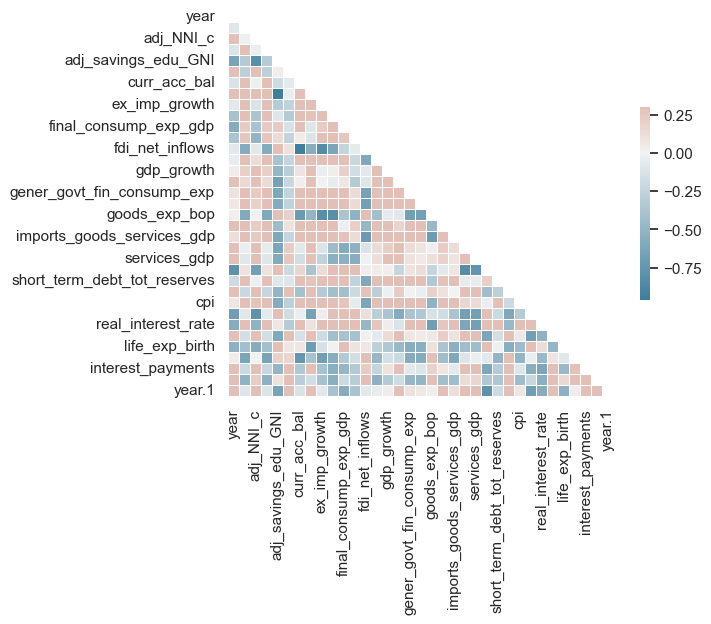

In [137]:
sns.set_theme(style="white")
corr = russia.corr(numeric_only=True)  #Computing correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool)) 
f, ax = plt.subplots(figsize=(7, 5))
cmap = sns.diverging_palette(230, 20, as_cmap=True) 
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

If you see for Russia, comparitively, most of the variables are negatively correlated to each other , few of them being Adjusted Savings for Education as a % for GNI, interest payemeets, etc.

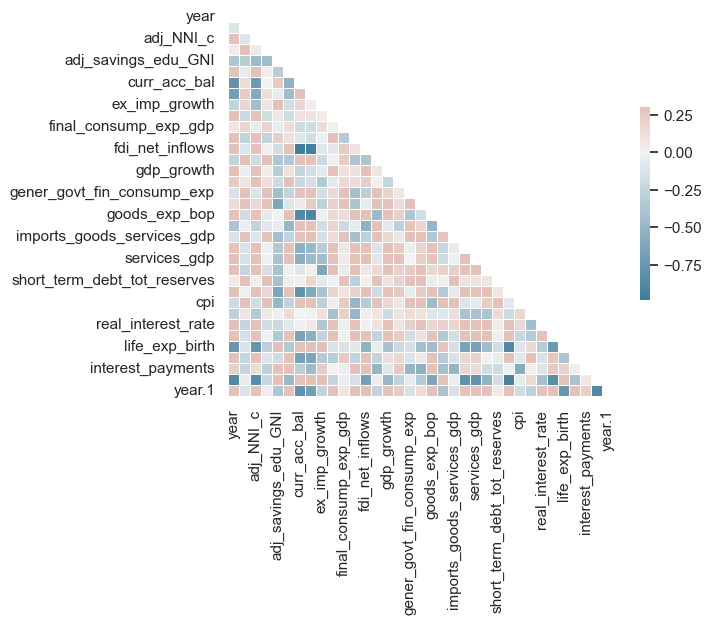

In [138]:
sns.set_theme(style="white")
corr = southafrica.corr(numeric_only=True)  #Computing correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool)) 
f, ax = plt.subplots(figsize=(7, 5))
cmap = sns.diverging_palette(230, 20, as_cmap=True) 
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

For Africa to, there are a lot of variables that are highly correlated to each other and the same for Brazil as well.

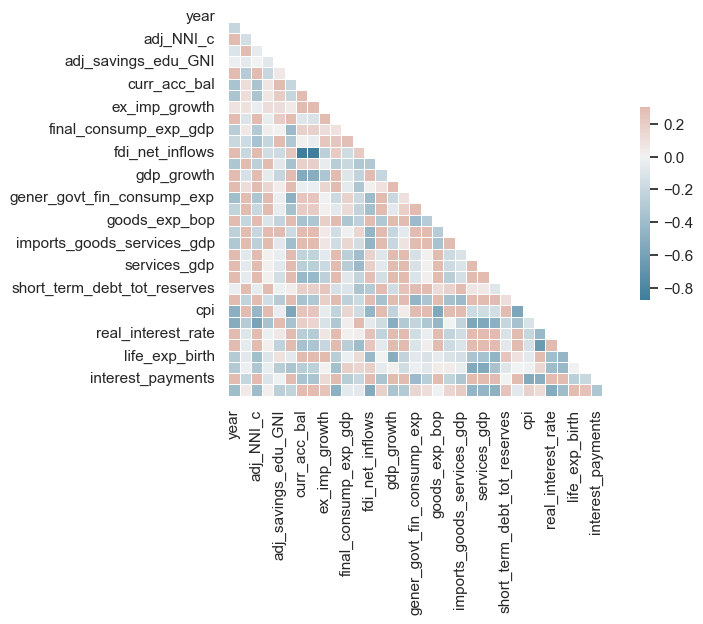

In [139]:
sns.set_theme(style="white")
corr = brazil.corr(numeric_only=True)  #Computing correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool)) 
f, ax = plt.subplots(figsize=(7, 5))
cmap = sns.diverging_palette(230, 20, as_cmap=True) 
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

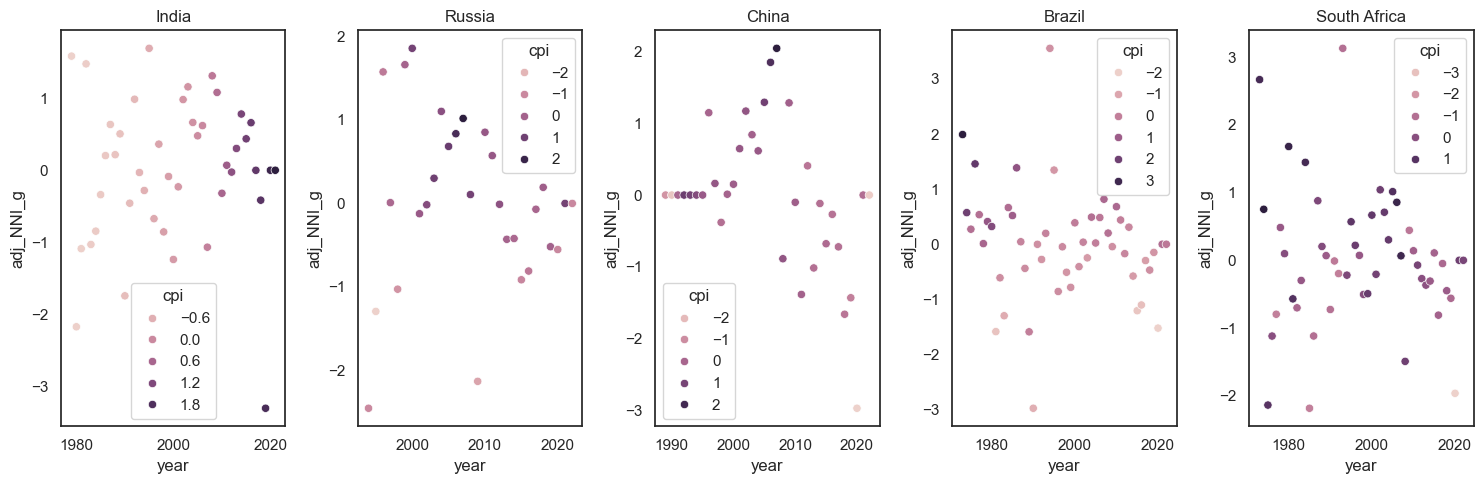

In [140]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
sns.scatterplot(data=india, x="year", y="adj_NNI_g", hue='cpi', ax=axes[0])
axes[0].set_title('India')
sns.scatterplot(data=russia, x="year", y="adj_NNI_g", hue='cpi', ax=axes[1])
axes[1].set_title('Russia')
sns.scatterplot(data=china, x="year", y="adj_NNI_g", hue='cpi', ax=axes[2])
axes[2].set_title('China')
sns.scatterplot(data=brazil, x="year", y="adj_NNI_g", hue='cpi', ax=axes[3])
axes[3].set_title('Brazil')
sns.scatterplot(data=southafrica, x="year", y="adj_NNI_g", hue='cpi', ax=axes[4])
axes[4].set_title('South Africa')

plt.tight_layout()
plt.show()


If you look at the scatterplot to understand the Adjusted Net National Income's growth, Brazil, India, China and Russia almost show no correlation with the year. It shows that irrespective of the year, they're parallel to the x axis, showcasing inelasticity.

/var/folders/cm/1bq_zvw92w99j_5d1p5jq5v40000gn/T/ipykernel_75422/980302243.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


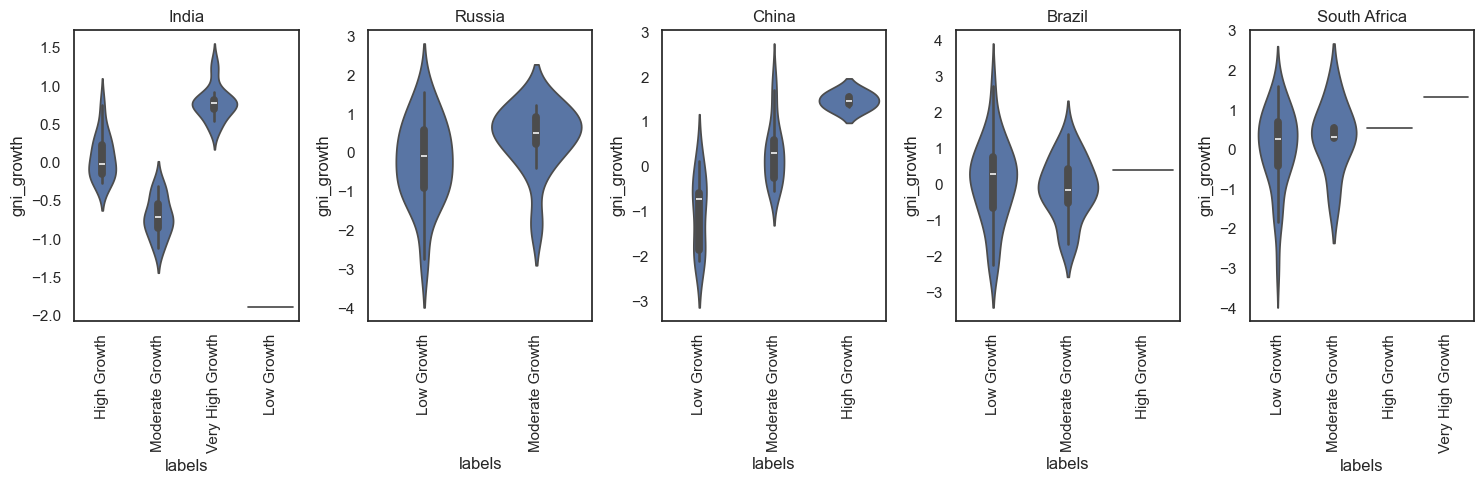

In [141]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
sns.violinplot(x="labels", y="gni_growth", data=india, ax=axes[0])
axes[0].set_title('India')
sns.violinplot(x="labels", y="gni_growth", data=russia, ax=axes[1])
axes[1].set_title('Russia')
sns.violinplot(x="labels", y="gni_growth", data=china, ax=axes[2])
axes[2].set_title('China')
sns.violinplot(x="labels", y="gni_growth", data=brazil, ax=axes[3])
axes[3].set_title('Brazil')
sns.violinplot(x="labels", y="gni_growth", data=southafrica, ax=axes[4])
axes[4].set_title('South Africa')
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

The violin plots showcase the association of the GDP labels with the GNI growth. There is greater density and spread in Russia, Brazil and South Africa in comparison to India.

Links used.
1. https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70
2. https://nbviewer.org/github/BadreeshShetty/Data-Visualization-using-Matplotlib/blob/master/%281%29Histograms.ipynb
